# Summary

1) Import libraries
2) Read data from forecast.nc
3) Check if there are missing, invalid, or not written data in forecast.nc file
4) Access elements of forecast.nc variables
--------------------------------------------
5) Read data from observation.nc
6) Check if there are missing, invalid, or not written data in observation.nc file
7) Access elements of observation.nc variables
8) Nan values in temperatura variable
9) Convert temperature values from Celsius to Kelvin
10) Data from São Paulo 
--------------------------------------------
11) Calculate Root Mean Squared Error (RMSE) of 6-hour time periods
--------------------------------------------
12) Date and time of forecast and observation datasets
13) Plot the heatmap of RMSE matrix values
14) Plot the graph of RMSE array values
15) Plot the graph of RMSE array values for São Paulo
--------------------------------------------
16) Save RMSE values in a NetCDF archive

## 1) Import libraries

In [24]:
from netCDF4 import Dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import session_info

## 2) Read data from forecast.nc

In [25]:
#Open the forecast NetCDF Dataset object
forecast = Dataset("forecast.nc")

## 3) Check if there are missing, invalid, or not written data in forecast.nc file

In [26]:
forecast_variables = forecast.variables
print(forecast_variables)
#there is a missing, invalid or not written value in the t2m variable that is filled
#with the default fill value: 9.969209968386869e+36

{'lat': <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    grads_dim: Y
unlimited dimensions: 
current shape = (25,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    grads_dim: x
unlimited dimensions: 
current shape = (37,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    standard_name: time
    units: hours since 2018-4-14 00:00:00
    calendar: standard
    axis: T
unlimited dimensions: 
current shape = (72,)
filling on, default _FillValue of 9.969209968386869e+36 used, 't2m': <class 'netCDF4._netCDF4.Variable'>
float32 t2m(time, lat, lon)
    missing_value: 9.999e+20
unlimited dimensions: 
current shape = (72, 25, 37)
filling on, default _FillValue of 9.969209968386869e+

#### 3.1) To indicate that data values are missing, invalid, or not written, special values are conventionally used. NetCDF data may include variable values that are not written, either on purpose or unintentionally. To detect attempts to later read unwritten data, the netCDF library initializes data with the value of a variable's _FillValue attribute (in the case of this forecast dataset) 

## 4) Access elements of forecast.nc variables

In [27]:
latitude_forecast = forecast.variables['lat'][:] #lat variable
longitude_forecast = forecast.variables['lon'][:] #lon variable
time_forecast = forecast.variables['time'][:] #time variable

#### 4.1) Acess only the information of t2m variable

In [28]:
t2m_forecast = forecast.variables['t2m']

#### 4.2) If you try to acess the elements of t2m variable (t2m_forecast = forecast.variables['t2m'][:,:,:]), python will give an error: <font color='red'>missing_value not used since it cannot be safely cast to variable data type</font> 

#### 4.3) The problem occurs because _FillValue should have the same data type as the variable it describes. The python interface checks for this. If the _FillValue and missing_value don't have the same data type, python interface tries to cast it to that type before using it to create a masked array. The problem is solved by turning off the auto conversion to masked arrays using:

In [29]:
t2m_forecast.set_auto_mask(False)

#now, it is possible to access the elements of the variable
t2m_forecast = t2m_forecast[:,:,:]

#### 4.4) It is possible to check that the fill value nor the missing value aren't present (not written) in t2m_forecast

In [30]:
#looking for the maximum value in t2m_forecast
max_t2m = np.max(t2m_forecast)
print(max_t2m)

304.1348


## 5) Read data from observation.nc

In [31]:
observation = Dataset('observation.nc')

## 6) Check if there are missing, invalid, or not written data in observation.nc archive

In [32]:
observation_variables = observation.variables
print(observation_variables)
#there is a missing, invalid or not written value in the temperature variable that is filled
#with the default fill value: 9.999e+20

{'time': <class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    standard_name: time
    units: hours since 2018-04-13 00:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (72,)
filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (37,)
filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (25,)
filling off, 'temperatura': <class 'netCDF4._netCDF4.Variable'>
float32 temperatura(time, lat, lon)
    _FillValue: 9.999e+20
    missing_value: 9.999e+20
unlimited dimensions: time
current shape = (72, 25, 37)
filling off}


## 7) Access elements of observation.nc variables

In [33]:
latitude_observation = observation.variables['lat'][:] #lat variable
longitude_observation = observation.variables['lon'][:] #lon variable
time_observation = observation.variables['time'][:] #time variable
temperature_observation = observation.variables['temperatura'][:,:,:] #temperatura variable; time is the first dimension

## 8) Nan values in temperatura variable

#### 8.1) There are nan values in the temperatura variable (temperature_observation), so it is necessary to replace them before continuing

In [34]:
print("temperature_observations:", temperature_observation)

temperature_observations: [[[24.555346 22.20913  19.55323  ... 23.974134 24.205818       nan]
  [23.840425 22.546028 21.182674 ... 23.717377 24.124369       nan]
  [24.558758 24.092096 22.233204 ... 23.463125 23.867765 24.274193]
  ...
  [23.366554 23.118279 23.335127 ... 19.998968 19.034348 19.212759]
  [23.229092 23.090694 23.18321  ... 19.71424  18.455933 19.171835]
  [22.799225 23.16104  22.988428 ... 19.514805 18.255274 19.366264]]

 [[23.0389   21.056534 18.775661 ... 23.96885  24.088018       nan]
  [22.427336 21.402102 20.331194 ... 23.654697 24.104513       nan]
  [23.250803 22.956852 21.182058 ... 23.250193 23.770754 24.237524]
  ...
  [22.315239 22.061996 22.45395  ... 19.178183 18.466454 18.959047]
  [22.154556 22.138018 22.50622  ... 18.981682 17.976265 19.02524 ]
  [21.689274 22.266026 22.445536 ... 19.017405 17.89095  19.179226]]

 [[22.343906 20.277494 17.913841 ... 23.996265 24.072655       nan]
  [22.035135 20.915142 19.743467 ... 23.776476 24.126013       nan]
  [23.

#### 8.2) I decided to replace nan values with the mean of the temperature values that are not nan

In [35]:
#calculating the mean of the temperature values that are not nan
mean_temperature_observation = np.nanmean(temperature_observation)
print("mean_temperature_observations:", mean_temperature_observation) #temperature in celsius

#replace nan by the mean of the temperatura variable elements
temperature_observation[np.isnan(temperature_observation)] = mean_temperature_observation

mean_temperature_observations: 21.62573


#### 8.3) Now, the temperatura variable (temperature_observation) doesn't have nan values

In [36]:
print("temperature_observations:", temperature_observation)

temperature_observations: [[[24.555346 22.20913  19.55323  ... 23.974134 24.205818 21.62573 ]
  [23.840425 22.546028 21.182674 ... 23.717377 24.124369 21.62573 ]
  [24.558758 24.092096 22.233204 ... 23.463125 23.867765 24.274193]
  ...
  [23.366554 23.118279 23.335127 ... 19.998968 19.034348 19.212759]
  [23.229092 23.090694 23.18321  ... 19.71424  18.455933 19.171835]
  [22.799225 23.16104  22.988428 ... 19.514805 18.255274 19.366264]]

 [[23.0389   21.056534 18.775661 ... 23.96885  24.088018 21.62573 ]
  [22.427336 21.402102 20.331194 ... 23.654697 24.104513 21.62573 ]
  [23.250803 22.956852 21.182058 ... 23.250193 23.770754 24.237524]
  ...
  [22.315239 22.061996 22.45395  ... 19.178183 18.466454 18.959047]
  [22.154556 22.138018 22.50622  ... 18.981682 17.976265 19.02524 ]
  [21.689274 22.266026 22.445536 ... 19.017405 17.89095  19.179226]]

 [[22.343906 20.277494 17.913841 ... 23.996265 24.072655 21.62573 ]
  [22.035135 20.915142 19.743467 ... 23.776476 24.126013 21.62573 ]
  [23.

#### 8.4) It is possible to check that the fill value nor the missing value aren't present (not written) in temperature_observation

In [37]:
#looking for the maximum value in temperature_observation
max_temperature = np.max(temperature_observation)
print(max_temperature)

31.968285


## 9) Convert temperature from Celsius to Kelvin

#### 9.1) temperature_observation variable has to be converted from Celsius to Kelvin (SI unit). The reason is that t2m_forecast variable is in Kelvin (K) and temperature_observation variable is in Celsius (C).

In [38]:
temperature_observation[:, :, :] = temperature_observation[:,:,:] + 273.15 #Kelvin

## 10) Data from São Paulo 

#### 10.1) Data from São Paulo is obtained using the following coordinates: Latitude=8, Longitude=26 

In [39]:
#create an array for latitude and longitude of sao paulo that covers the observation and forecast datas
temperature_observation_sp = temperature_observation[:, 8, 26] #time, latitude, longitude
t2m_forecast_sp = t2m_forecast[:, 8, 26] #time, latitude, longitude
print("São Paulo latitude coordinate (observation):", latitude_observation[8])
print("São Paulo latitude coordinate (forecast):", latitude_forecast[8])
print("São Paulo longitude coordinate (observation):",longitude_observation[26])
print("São Paulo latitude coordinate (forecast):", longitude_forecast[26])

São Paulo latitude coordinate (observation): -23.52493
São Paulo latitude coordinate (forecast): -23.524933
São Paulo longitude coordinate (observation): -46.6783
São Paulo latitude coordinate (forecast): -46.6783


## 11) Calculate Root Mean Squared Error (RMSE) of 6-hour time periods

$\text{RMSE}(f, o) = \sqrt{\bar{(f - o)^2}}$

#### 11.1) I computed two sets of values for the RMSE. The first (RMSE_matrix), computes the mean value only in the time dimension. That is, there is are RMSE values for each latitude and longitude pair, for each time interval of 6 hours. The second (RMSE_array and RMSE_sp_array), computes the mean in all dimensions. That is, there is only one RMSE value for each 6 hour interval. This approach allows vizualization of the data both in terms of location (first set) and only terms of the time interval (second set)

In [40]:
RMSE_matrix = np.zeros((12,25,37))
RMSE_array = []
RMSE_sp_array = []
len_time_forecast = len(time_forecast) 
i = 0
timee = 0

for i in range(int(len_time_forecast/6)):
    
    #calculating RMSE in a 6-hour-interval that results in a matrix
    RMSE_matrix[i-1,:,:] = np.sqrt(np.mean((t2m_forecast[timee:timee+6,:,:] - temperature_observation[timee:timee+6,:,:])**2, axis = 0)) #axis = 0 is fixed. Axis=1 and axis = 2 vary 
    
    #calculating RMSE in 6-hour-interval that results in an array
    RMSE_array.append(np.sqrt(np.mean((t2m_forecast[timee:timee+6,:,:] - temperature_observation[timee:timee+6,:,:])**2)))
    
    #calculating RMSE in a 6-hour-interval for São Paulo (X=26 and Y=8) that results in an array
    RMSE_sp_array.append(np.sqrt(np.mean((t2m_forecast[timee:timee+6, 8, 26] - temperature_observation[timee:timee+6, 8, 26])**2)))
    
    timee = timee + 6 

## 12) Date and time of forecast and observation datasets

#### 12.1) It is possible to see, by means of analysing the datasets information, that this data corresponds to: since 04/14/2018 (forecast) and since 04/13/2018 (observation). It will be taken into consideration the following day/month/year: since 04/14/2018

In [41]:
print(forecast_variables['time'].units)
print(observation_variables['time'].units)

#defining the date/month/year and the time period analysed
date_time = ["04/14/2018, 12am-6am", "04/14/2018, 6am-12pm", "04/14/2018, 12pm-18pm", "04/14/2018, 18pm-00am",
            "04/15/2018, 00am-6pm", "04/15/2018, 6pm-12pm", "04/15/2018, 12pm-18pm", "04/15/2018, 18pm-00am",
            "04/16/2018, 00am-6am", "04/16/2018, 6am-12pm", "04/16/2018, 12pm-18pm", "04/16/2018, 18pm-00am"]

hours since 2018-4-14 00:00:00
hours since 2018-04-13 00:00


## 13) Plot the heatmap of RMSE matrix values

#### 13.1) Use Seaborn library to plot the heatmap of RMSE matrix values (RMSE of each 6-hour time period)

In [42]:
#defining figure size
fig = plt.figure(figsize = (110,110)) #figsize = (width,height)

#plotting the heatmap of the 6-hour time periods RMSE
for i in range(12):
    
    #defining subplot dimension
    plt.subplot(4,3,i+1)
    ax = sns.heatmap(data=RMSE_matrix[i])#, cbar_kws={'label': 'Root Mean Square Error [K]'})
    
    sns.set(font_scale=5)
    
    cbar = ax.collections[0].colorbar
    cbar.set_label('Root Mean Square Error [K]', labelpad=40)
    
    plt.xlabel('Longitude Index', labelpad=22)
    plt.ylabel("Latitude Index", labelpad=22)
    plt.title(date_time[i], pad=50)
                
    
fig.suptitle('RMSE of 6-Hour Time Periods [mm/dd/yyyy, hh-hh]', fontsize = 100, fontweight = 'extra bold')

#save plot
plt.savefig('RMSE_matrix.png',  bbox_inches = 'tight')

## 14) Plot the graph of RMSE array values

#### 14.1)  Use Matplotlib library to plot the graph of RMSE array values (RMSE of 6-hour time periods)

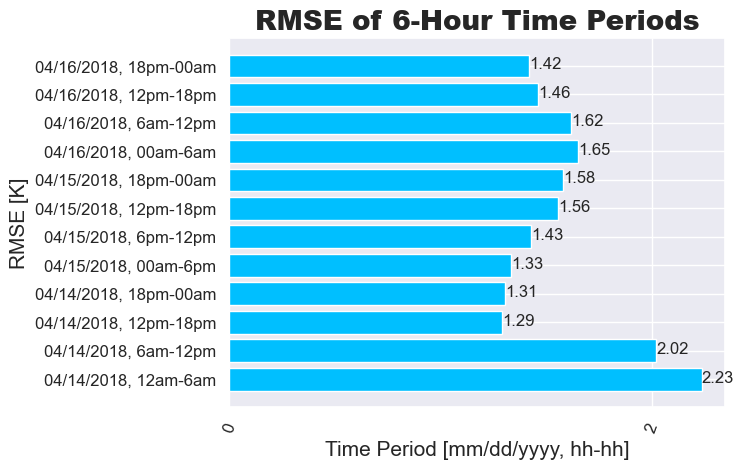

In [43]:
#horizontal bar plot
fig = plt.barh(date_time, RMSE_array, color='deepskyblue')

#show the value of each bar
for i in range(len(RMSE_array)):
    plt.text(RMSE_array[i], i-0.1, str(round(RMSE_array[i], 2)), fontsize=12)
    
#adjust xticks and yticks
plt.xticks(rotation=70, fontsize=12)
plt.yticks(fontsize=12)

#label x-axis
plt.xlabel('Time Period [mm/dd/yyyy, hh-hh]', fontsize = 15)

#label y-axis
plt.ylabel('RMSE [K]', fontsize = 15)

#label the plot
plt.title('RMSE of 6-Hour Time Periods', fontsize = 20, fontweight = 'extra bold')

#save the plot
plt.savefig('RMSE_array.png',  bbox_inches = 'tight')

## 15) Plot the graph of RMSE array values for São Paulo

#### 15.1) Use Matplotlib library to plot the graph of RMSE array values (RMSE of 6-hour time periods) for São Paulo 

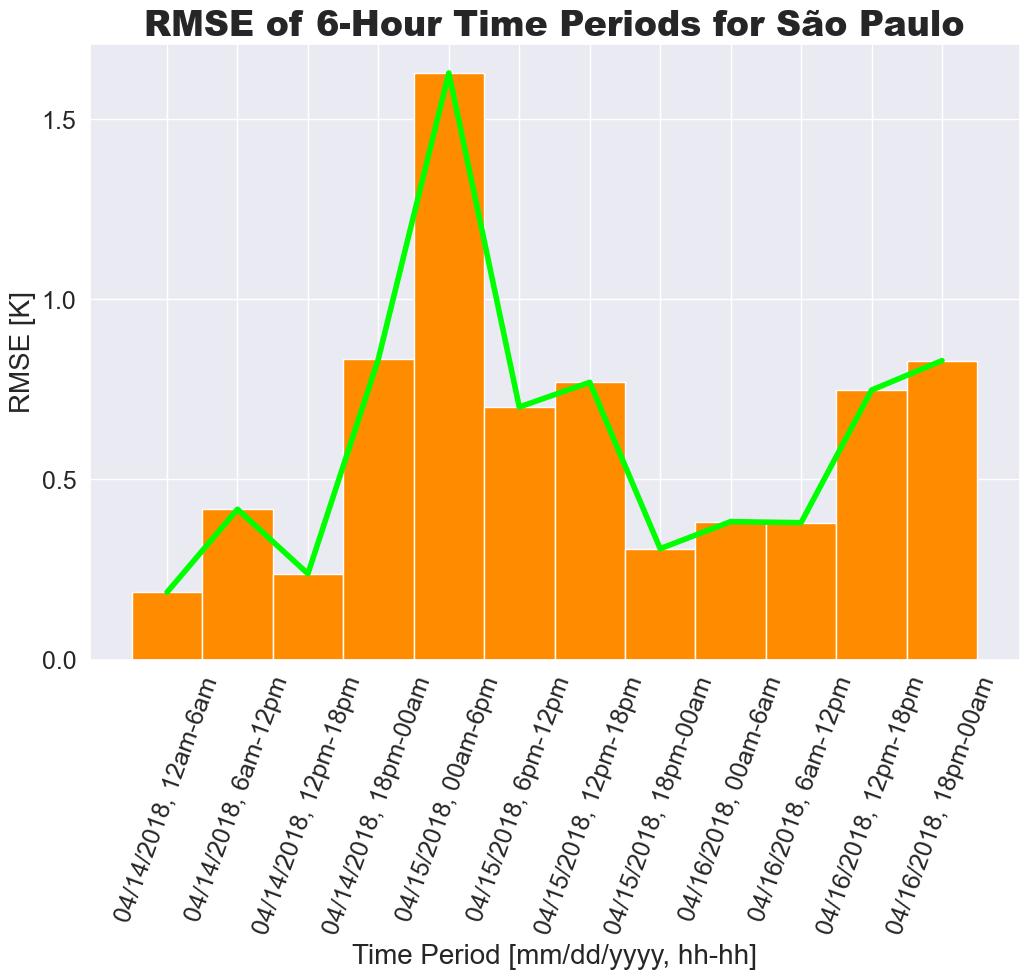

In [44]:
#defining figure size
plt.figure(figsize = (12,8)) #figsize = (width,height)

#bar plot 
plt.bar(date_time, RMSE_sp_array, color='darkorange', width=1)
plt.plot(RMSE_sp_array, color='lime', linewidth=4)

#adjust xticks and yticks
plt.xticks(rotation=70, fontsize=18)
plt.yticks(fontsize=18)

#label x-axis
plt.xlabel('Time Period [mm/dd/yyyy, hh-hh]', fontsize = 20)

#label y-axis
plt.ylabel('RMSE [K]', fontsize = 20)

#label the plot
plt.title('RMSE of 6-Hour Time Periods for São Paulo', fontsize = 25, fontweight = 'extra bold')

#save the plot
plt.savefig('RMSE_sp_array.png', bbox_inches = 'tight')

## 16) Save RMSE values in a NetCDF archive

In [45]:
rmsefile = Dataset('rmsefile.nc', mode='w',format='NETCDF4_CLASSIC')

#create the dimensions of RMSE variables
RMSE_matrix_dimension1 = rmsefile.createDimension("RMSE Matrix Time", 12)
RMSE_matrix_dimension2 = rmsefile.createDimension("RMSE Matrix Latitude", 25)
RMSE_matrix_dimension3 = rmsefile.createDimension("RMSE Matrix Longitude", 37)
RMSE_array_dimension = rmsefile.createDimension("RMSE Array", len(RMSE_array))
RMSE_sp_array_dimension = rmsefile.createDimension("RMSE SP Array", len(RMSE_sp_array))

#create the variables
RMSE_matrix_variable1 = rmsefile.createVariable("RMSE Matrix Time", np.float32, ("RMSE Matrix Time",))
RMSE_matrix_variable2 = rmsefile.createVariable("RMSE Matrix Latitude", np.float32, ("RMSE Matrix Latitude",))
RMSE_matrix_variable3 = rmsefile.createVariable("RMSE Matrix Longitude", np.float32, ("RMSE Matrix Longitude",))
RMSE_array_variable = rmsefile.createVariable("RMSE Array", np.float32, ("RMSE Array",))
RMSE_sp_array_variable = rmsefile.createVariable("RMSE SP Array", np.float32, ("RMSE SP Array",))

#define the unit of RMSE variables
RMSE_matrix_variable1.units = 'Kelvin [K]'
RMSE_matrix_variable2.units = 'Kelvin [K]'
RMSE_matrix_variable3.units = 'Kelvin [K]'
RMSE_array_variable.units = 'Kelvin [K]' 
RMSE_sp_array_variable.units = 'Kelvin [K]'

#define the long name of RMSE variables
RMSE_matrix_variable1.longname = 'Root Mean Squared Error Matrix Time Dimension'
RMSE_matrix_variable2.longname = 'Root Mean Squared Error Matrix Latitude Dimension'
RMSE_matrix_variable3.longname = 'Root Mean Squared Error Matrix Longitude Dimension'
RMSE_array_variable.longname = 'Root Mean Squared Error Array'
RMSE_sp_array_variable.longname = 'Root Mean Squared Error Array for São Paulo'
 
#pass the array of the calculated RMSEs to the variables created
RMSE_matrix_variable1 = RMSE_matrix[0]
RMSE_matrix_variable2 = RMSE_matrix[1]
RMSE_matrix_variable3 = RMSE_matrix[2]
RMSE_array_variable = RMSE_array
RMSE_sp_array_variable = RMSE_sp_array
rmsefile.close()

rmse = Dataset("rmsefile.nc")
rmse_variables = rmse.variables
print(rmse_variables)


#close the dataset
rmsefile.close()

{'RMSE Matrix Time': <class 'netCDF4._netCDF4.Variable'>
float32 RMSE Matrix Time(RMSE Matrix Time)
    units: Kelvin [K]
    longname: Root Mean Squared Error Matrix Time Dimension
unlimited dimensions: 
current shape = (12,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'RMSE Matrix Latitude': <class 'netCDF4._netCDF4.Variable'>
float32 RMSE Matrix Latitude(RMSE Matrix Latitude)
    units: Kelvin [K]
    longname: Root Mean Squared Error Matrix Latitude Dimension
unlimited dimensions: 
current shape = (25,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'RMSE Matrix Longitude': <class 'netCDF4._netCDF4.Variable'>
float32 RMSE Matrix Longitude(RMSE Matrix Longitude)
    units: Kelvin [K]
    longname: Root Mean Squared Error Matrix Longitude Dimension
unlimited dimensions: 
current shape = (37,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'RMSE Array': <class 'netCDF4._netCDF4.Variable'>
float32 RMSE Array(RMSE Array)
    units: Kelvin 